In [719]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
file_path =r"C:\Users\Abdel\Downloads\SLD2.csv"
df = pd.read_csv(file_path)
df.head(10)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,Moderate,2.99
1,5.3,3.5,8.0,4.2,3.0,Low,2.75
2,5.1,3.9,9.2,1.2,4.6,Low,2.67
3,6.5,2.1,7.2,1.7,6.5,Moderate,2.88
4,8.1,0.6,6.5,2.2,6.6,High,3.51
5,6.0,2.1,8.0,0.3,7.6,Moderate,2.85
6,8.0,0.7,5.3,5.7,4.3,High,3.08
7,8.4,1.8,5.6,3.0,5.2,High,3.20
8,5.2,3.6,6.3,4.0,4.9,Low,2.82
9,7.7,0.7,9.8,4.5,1.3,Moderate,2.76


In [721]:
df.shape

(2000, 7)

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              1950 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   Stress_Level                     2000 non-null   object 
 6   GPA                              2000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [723]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,1950.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.498564,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.459657,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [724]:
df.isnull().sum()

Study_Hours_Per_Day                 0
Extracurricular_Hours_Per_Day       0
Sleep_Hours_Per_Day                50
Social_Hours_Per_Day                0
Physical_Activity_Hours_Per_Day     0
Stress_Level                        0
GPA                                 0
dtype: int64

In [725]:
df.duplicated().sum().sum()

0

In [726]:
df['Sleep_Hours_Per_Day'] = df['Sleep_Hours_Per_Day'].replace('', np.nan) 
df['Sleep_Hours_Per_Day'] = pd.to_numeric(df['Sleep_Hours_Per_Day'], errors='coerce')  # Convert to numeric 
df['Sleep_Hours_Per_Day'] = df['Sleep_Hours_Per_Day'].fillna(df['Sleep_Hours_Per_Day'].mean())  # Fill NaN with mean

In [727]:
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [728]:
df.head(10)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,2,2.99
1,5.3,3.5,8.0,4.2,3.0,1,2.75
2,5.1,3.9,9.2,1.2,4.6,1,2.67
3,6.5,2.1,7.2,1.7,6.5,2,2.88
4,8.1,0.6,6.5,2.2,6.6,0,3.51
5,6.0,2.1,8.0,0.3,7.6,2,2.85
6,8.0,0.7,5.3,5.7,4.3,0,3.08
7,8.4,1.8,5.6,3.0,5.2,0,3.20
8,5.2,3.6,6.3,4.0,4.9,1,2.82
9,7.7,0.7,9.8,4.5,1.3,2,2.76


In [729]:
X = df.iloc[:, 0:6].values 
y = df.iloc[:, -1].values   

In [730]:
X.shape

(2000, 6)

In [731]:
y.shape

(2000,)

In [732]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [733]:
X_train

array([[6.9, 3.4, 5.7, 3. , 5. , 0. ],
       [6.5, 1.4, 8.1, 2. , 6. , 2. ],
       [6.6, 2.9, 9.1, 1. , 4.4, 2. ],
       ...,
       [8. , 2.1, 6.4, 0. , 7.5, 2. ],
       [8.6, 2.7, 7.4, 3.4, 1.9, 0. ],
       [8.2, 2.2, 5.6, 2.3, 5.7, 0. ]])

In [734]:
X_test

array([[6.2, 4. , 6. , 3.5, 4.3, 2. ],
       [5.9, 2.2, 9.9, 5.6, 0.4, 1. ],
       [9.6, 2.3, 8.3, 3.5, 0.3, 0. ],
       ...,
       [7.4, 1.6, 6.6, 2.7, 5.7, 2. ],
       [5.9, 1.6, 9.7, 0.8, 6. , 1. ],
       [8.7, 3.7, 7.1, 1.5, 3. , 0. ]])

In [735]:
y_train

array([3.37, 3.06, 2.85, ..., 2.83, 3.45, 3.28])

In [736]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [737]:
y_pred = regressor.predict(X_test)

In [738]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.04272537545241433
Mean Absolute Error: 0.16388578265468262
R^2 Score: 0.5285578929722119


Text(0, 0.5, 'Predicted Y')

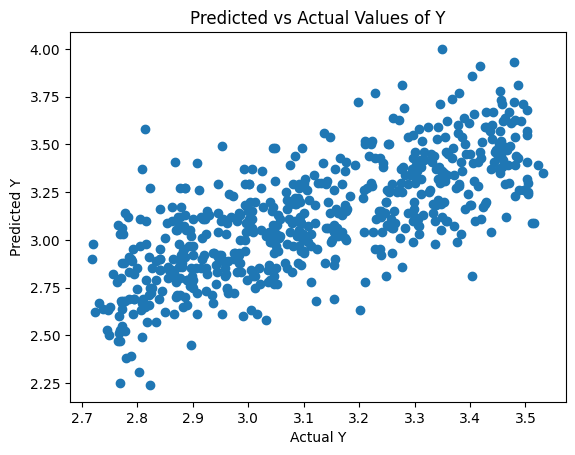

In [739]:
plt.scatter(y_pred,y_test)
plt.title("Predicted vs Actual Values of Y")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

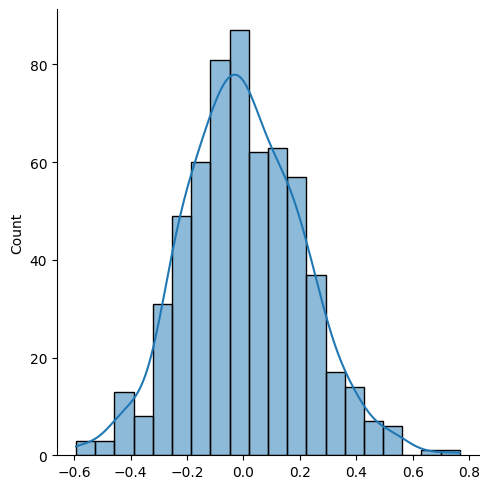

In [740]:
residuals = y_test - y_pred

sns.displot(residuals,bins=20,kde=True)

In [741]:
# Display the range of numbers in each column
range_df = df.describe().loc[['min', 'max']].T
range_df['Range'] = range_df['max'] - range_df['min']

print(range_df)

                                  min   max  Range
Study_Hours_Per_Day              5.00  10.0   5.00
Extracurricular_Hours_Per_Day    0.00   4.0   4.00
Sleep_Hours_Per_Day              5.00  10.0   5.00
Social_Hours_Per_Day             0.00   6.0   6.00
Physical_Activity_Hours_Per_Day  0.00  13.0  13.00
Stress_Level                     0.00   2.0   2.00
GPA                              2.24   4.0   1.76


In [742]:
from IPython.display import display
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df.head(20))

,Actual,Predicted
0,2.88,2.880166
1,3.12,2.877137
2,3.41,3.443020
3,3.11,3.074050
4,3.19,3.332882
5,3.31,3.141606
6,3.03,3.308367
7,3.12,3.092759
8,3.06,3.005707
9,3.36,3.349244


In [743]:
Trial_Data = np.array([[9 , 1.7 , 7.3 , 3.1 , 2.9 , 0]])
#3.58

#6.9,3.8,8.7,2.8,1.8,2	
#2.99


In [711]:
regressor.predict(Trial_Data)[0]

3.361238843766249